In [37]:
%config Completer.use_jedi=False
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

In [38]:
'''
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica
'''
df = pd.read_csv('iris.data', names=['sl','sw','pl','pw','class'], index_col = False)
Y= LabelEncoder().fit_transform(df['class'])
Y = to_categorical(Y)

X= df.drop('class', axis=1)
X_train = X[:-5]
X_test = X[-5:]

Y_train = Y[:-5]
Y_test = Y[-5:]






In [50]:
model = Sequential()
model.add(Dense(256, activation='relu',input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=100, validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________
Train on 130 samples, validate on 15 samples
Epoch 1/100
130/130 [==============================] - 0s 2ms/step - loss: 0.9273 - acc: 0.7231 - val_loss: 0.9484 - val_acc: 0.0000e+00
Epoch 2/100
130/130 [==============================] - 0s 69us/step - loss: 0.7003 - acc

Epoch 55/100
130/130 [==============================] - 0s 92us/step - loss: 0.1343 - acc: 0.9385 - val_loss: 0.1610 - val_acc: 1.0000
Epoch 56/100
130/130 [==============================] - 0s 77us/step - loss: 0.0706 - acc: 0.9769 - val_loss: 0.0606 - val_acc: 1.0000
Epoch 57/100
130/130 [==============================] - 0s 84us/step - loss: 0.0910 - acc: 0.9692 - val_loss: 0.1998 - val_acc: 0.8667
Epoch 58/100
130/130 [==============================] - 0s 107us/step - loss: 0.0667 - acc: 0.9615 - val_loss: 0.4688 - val_acc: 0.7333
Epoch 59/100
130/130 [==============================] - 0s 61us/step - loss: 0.0863 - acc: 0.9538 - val_loss: 0.3742 - val_acc: 0.8000
Epoch 60/100
130/130 [==============================] - 0s 92us/step - loss: 0.0791 - acc: 0.9538 - val_loss: 0.3776 - val_acc: 0.7333
Epoch 61/100
130/130 [==============================] - 0s 61us/step - loss: 0.0840 - acc: 0.9538 - val_loss: 0.2364 - val_acc: 0.8000
Epoch 62/100
130/130 [==============================] 

Text(0.5, 1.0, 'acc')

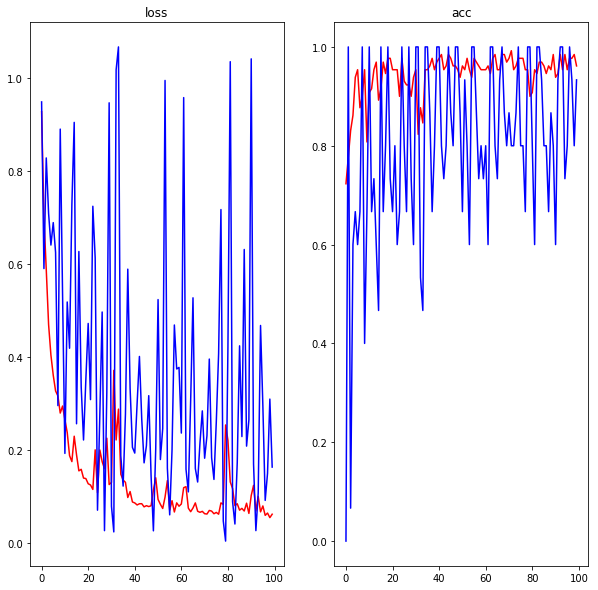

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')

In [52]:
score = model.evaluate(X_test, Y_test)

pred = model.predict(X_test)
print(pred)
print(Y_test)

5/5 [==============================] - 0s 199us/step
[[5.8326254e-08 2.6125059e-02 9.7387493e-01]
 [1.5558575e-07 3.1750988e-02 9.6824884e-01]
 [3.1603497e-07 8.1872009e-02 9.1812772e-01]
 [2.6335711e-08 1.1357050e-02 9.8864299e-01]
 [4.8905991e-07 6.8439066e-02 9.3156046e-01]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
